# Build and Test Experiments

## `x86` assembly with `nostd` and `kernel32.lib`

Uses my fantastic one of a kind build script `BuildO`!

Because I will never be persuaded to use Visual Studio again! And besides, you
will never replicate my build process on your own machine, so why should you be
able to understand my build script? Creating unintelligible build scripts seems
to be lesson one in assembly. Yay for assembly.

In [1]:
import os
import struct
from pathlib import Path

from buildo import BuildO, LibO, MSVC_Linker, NASM_Assembler, cleanup

In [2]:
cleanup(".")

The following files will be deleted:
    01_exit42\main.obj
    02_exit_arg\main.obj
    03_include_test\main.obj
    04_hello_world\main.obj
    05_hello_world_repeat\main.obj
    07_write_out_float\main.obj
    01_exit42\main.exe
    02_exit_arg\main.exe
    03_include_test\main.exe
    04_hello_world\main.exe
    05_hello_world_repeat\main.exe
    07_write_out_float\main.exe
    08_leibniz_pi\main.exe
    07_write_out_float\out.txt
    08_leibniz_pi\out.txt
Done


In [3]:
buildo = BuildO(
    linko = MSVC_Linker(
        r"C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.40.33807\bin\Hostx86\x86\link.exe"
    )
    .with_no_default_lib()
    .with_entry_point("start")
    .with_libo(
        LibO(r"C:\Program Files (x86)\Windows Kits\10\Lib\10.0.26100.0\um\x86")
        .with_lib("Kernel32.Lib")
    ),
    assemblo = NASM_Assembler(
        os.path.expandvars(r"%LOCALAPPDATA%\bin\NASM\nasm.EXE")
    ),
)

In [4]:
buildo.build("./01_exit42/main.asm").run_print()

Return Code: 42


In [5]:
# this demo gets a pointer to the arguments address, and simply loads the first 4 bytes into
# the return code as an integer.
# the result is the start of the name of the exe file.
# Or it may be the start of the full path depending on how it was called.
result = buildo.build("./02_exit_arg/main.asm").run()
# unpack 4 bytes as an int each from 32 bit integer string
chars =  int(result.returncode).to_bytes(4, byteorder='little', signed=False)
print(chars)

b'"M:\\'


In [6]:
buildo.build("./03_include_test/main.asm").run_print()

     StdOut: Hello, World!
 


In [7]:
buildo.build("./04_hello_world/main.asm").run_print()

     StdOut: Hello, World!
 


In [8]:
buildo.build("./05_hello_world_repeat/main.asm").run_print()

     StdOut: Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 Hello, World!
 


In [9]:
# Fail; seems impossible to get prinf to import ??

# buildo.with_linko(
#     buildo
#     .linko
#     # .with_libo(
#     #     LibO(r"C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.40.33807\lib\x86")
#     #     .with_lib("libvcruntime.lib") # printf ????!
#     # )
#     .with_default_lib()
# ).with_verbose(True).build("06_c_msvcrt_print_float_test/main.asm").run_print()

In [10]:
buildo.build("./07_write_out_float/main.asm").run_print()
output = Path("./07_write_out_float/out.txt")
print(output.read_text())
print("float output: ",struct.unpack("d",output.read_bytes()[-8:])[0])

"M:\GIT\x86 exploration\07_write_out_float\main.exe"
Hello, World!
Tã¥›Ä 	@
float output:  3.141


In [66]:
buildo.build("./08_leibniz_pi/main.asm").run_print()
output = Path("./08_leibniz_pi/out.txt").read_bytes()
print(f"Output length: {len(output)/8}")
data = [
    struct.unpack("f",output[index:index+8])[0]
    for index
    in range(0, len(output),8)
]
data

Output length: 5000.0


[3.1417925357818604,
 -0.3333333432674408,
 0.20000000298023224,
 -0.1428571492433548,
 0.1111111119389534,
 -0.09090909361839294,
 0.07692307978868484,
 -0.06666667014360428,
 0.05882352963089943,
 -0.05263157933950424,
 0.0476190485060215,
 -0.043478261679410934,
 0.03999999910593033,
 -0.03703703731298447,
 0.03448275849223137,
 -0.032258063554763794,
 0.03030303120613098,
 -0.02857142873108387,
 0.027027027681469917,
 -0.025641025975346565,
 0.024390242993831635,
 -0.023255813866853714,
 0.02222222276031971,
 -0.021276595070958138,
 0.020408162847161293,
 -0.019607843831181526,
 0.01886792480945587,
 -0.0181818176060915,
 0.017543859779834747,
 -0.016949152573943138,
 0.016393441706895828,
 -0.01587301678955555,
 0.015384615398943424,
 -0.014925372786819935,
 0.014492753893136978,
 -0.014084506779909134,
 0.013698630034923553,
 -0.013333333656191826,
 0.012987012974917889,
 -0.012658228166401386,
 0.012345679104328156,
 -0.012048192322254181,
 0.0117647061124444,
 -0.01149425283074

<Axes: >

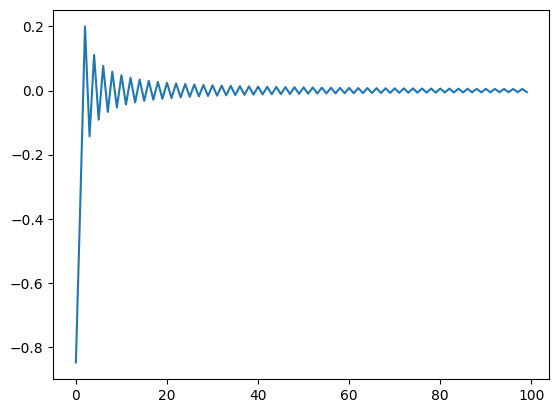

In [54]:
import pandas as pd
pd.Series(data).plot()

In [ ]:
acc = 0
add=True
for item in data:
    if add:
        acc+=item
    else:
        acc-=item
    add = not add
acc*4

4.868407160043716